In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)


2.8.0


In [3]:
(X_train, t_train), (X_test, t_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 7s 1us/step


Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)
x: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  83 149   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 245   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  32 254  40   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  66  68   0   0   0   0   0  15 232 144   0
    0   0   0   0   0   0   

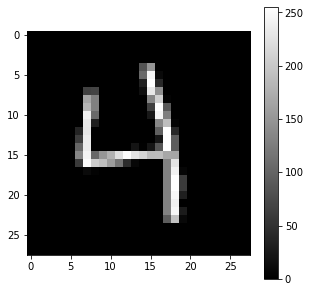

In [4]:
print("Training data:", X_train.shape, t_train.shape)
print("Test data:", X_test.shape, t_test.shape)

idx = 682 # for example
x = X_train[idx, :]
t = t_train[idx]
print("x:", x)
print("x (shape):", x.shape)
print("t:", t)

plt.figure(figsize=(5, 5))
plt.imshow(x, cmap="gray")
plt.colorbar()
plt.show()

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255.

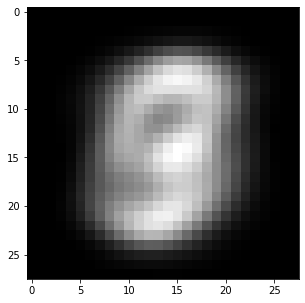

In [6]:
X_mean = np.mean(X_train, axis=0)
X_train -= X_mean
X_test -= X_mean


plt.figure(figsize=(5, 5))
plt.imshow(X_mean.reshape((28, 28))*255, cmap="gray")
plt.show()

In [7]:
T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

print(T_train[idx])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model = tf.keras.models.Sequential()

# Input layer representing the 784 pixels
model.add(tf.keras.layers.Input(shape=(784,)))

# Hidden layer with 100 logistic neurons
model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('sigmoid')) 

# Softmax output layer over 10 classes
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax')) 

# Learning rule
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
model.fit(
    X_train, T_train, # training data
    batch_size=128,  # batch size
    epochs=20, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/20
422/422 [==============================] - 3s 5ms/step - loss: 2.0529 - accuracy: 0.4662 - val_loss: 1.8001 - val_accuracy: 0.6740
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 1.6234 - accuracy: 0.6857 - val_loss: 1.3991 - val_accuracy: 0.7700
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 1.2938 - accuracy: 0.7548 - val_loss: 1.1084 - val_accuracy: 0.8217
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 1.0637 - accuracy: 0.7937 - val_loss: 0.9108 - val_accuracy: 0.8510
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.9072 - accuracy: 0.8165 - val_loss: 0.7762 - val_accuracy: 0.8675
Epoch 6/20
422/422 [==============================] - 1s 4ms/step - loss: 0.7984 - accuracy: 0.8326 - val_loss: 0.6820 - val_accuracy: 0.8755
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.7199 - accuracy: 0.8419 - val_loss: 0.6123 - val_accuracy: 0.8828
Epoch 

In [12]:
score = model.evaluate(X_test, T_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.39243489503860474
Test accuracy: 0.8952000141143799


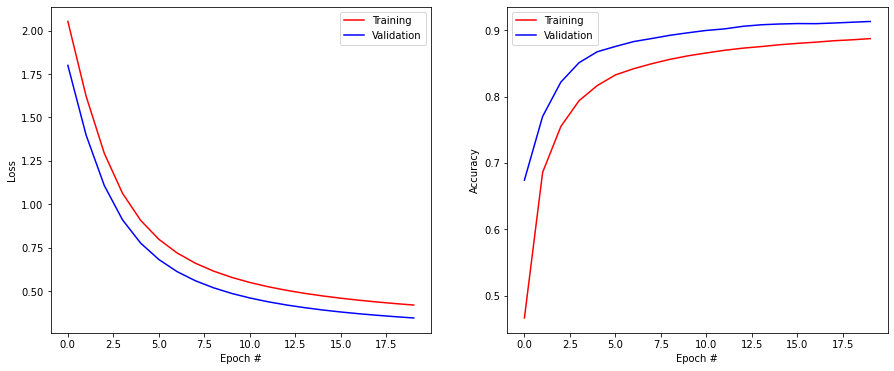

In [13]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               117750    
                                                                 
 batch_normalization (BatchN  (None, 150)              600       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                        

C:\Users\Diksha\.conda\envs\diksha_env\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


422/422 [==============================] - 5s 8ms/step - loss: 0.4577 - accuracy: 0.8662 - val_loss: 0.1389 - val_accuracy: 0.9583
Epoch 2/20
422/422 [==============================] - 3s 7ms/step - loss: 0.2267 - accuracy: 0.9314 - val_loss: 0.1016 - val_accuracy: 0.9697
Epoch 3/20
422/422 [==============================] - 3s 7ms/step - loss: 0.1789 - accuracy: 0.9452 - val_loss: 0.0858 - val_accuracy: 0.9745
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.1498 - accuracy: 0.9546 - val_loss: 0.0741 - val_accuracy: 0.9768
Epoch 5/20
422/422 [==============================] - 3s 7ms/step - loss: 0.1297 - accuracy: 0.9606 - val_loss: 0.0696 - val_accuracy: 0.9805
Epoch 6/20
422/422 [==============================] - 3s 7ms/step - loss: 0.1211 - accuracy: 0.9617 - val_loss: 0.0694 - val_accuracy: 0.9787
Epoch 7/20
422/422 [==============================] - 3s 7ms/step - loss: 0.1066 - accuracy: 0.9671 - val_loss: 0.0637 - val_accuracy: 0.9808
Epoch 8/20
422/42

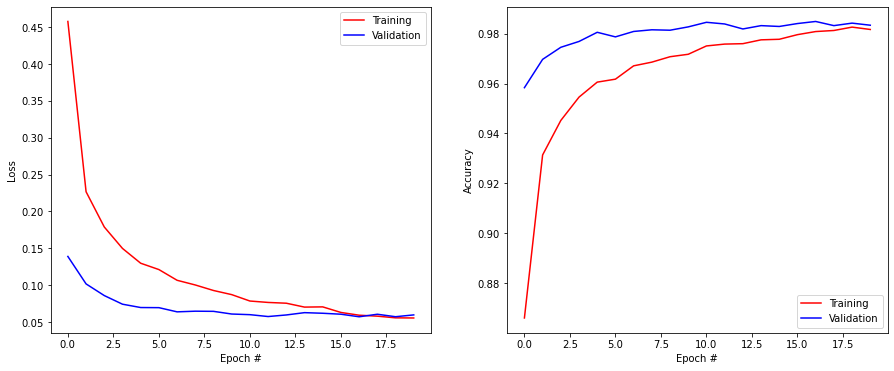

In [14]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model = tf.keras.models.Sequential()

# Input layer representing the 784 pixels
model.add(tf.keras.layers.Input(shape=(784,)))

# Hidden layer with 150 relu neurons, BN and dropout
model.add(tf.keras.layers.Dense(units=150))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.3)) 


# Second hidden layer with 100 relu neurons, BN and dropout
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.3))

# Softmax output layer over 10 classes
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

# Learning rule
optimizer = tf.keras.optimizers.Adam(lr=0.001)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model.summary())

# Training
history = tf.keras.callbacks.History()
model.fit(
    X_train, T_train,
    batch_size=128, 
    epochs=20,
    validation_split=0.1,
    callbacks=[history]
)

# Testing
score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()
plt.show()